<a href="https://colab.research.google.com/github/Hanzlazafar1/DIP_assignment_02/blob/main/dipcomplete_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [2]:
dataset_path = '/content/drive/MyDrive/data'

In [3]:
# Image data generator for training and validation (with augmentation)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Load training and validation data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1101 images belonging to 2 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 275 images belonging to 2 classes.


In [6]:
# Define CNN model
model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: with_mask and without_mask

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.weights.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='auto',
                             save_weights_only=True)


In [9]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.5285 - loss: 0.9654 - val_accuracy: 0.6582 - val_loss: 0.6879
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.5174 - loss: 0.6930 - val_accuracy: 0.5018 - val_loss: 0.6933
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.5798 - loss: 0.6471 - val_accuracy: 0.9127 - val_loss: 0.2516
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.9397 - loss: 0.2003 - val_accuracy: 0.9527 - val_loss: 0.1620
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.9421 - loss: 0.1606 - val_accuracy: 0.9564 - val_loss: 0.1414
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - accuracy: 0.9416 - loss: 0.1386 - val_accuracy: 0.9491 - val_loss: 0.0972
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.9546 - loss: 0.1398 - val_accuracy: 0.9673 - val_loss: 0.1103
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.9705 - loss: 0.0919 - val_accuracy: 0.

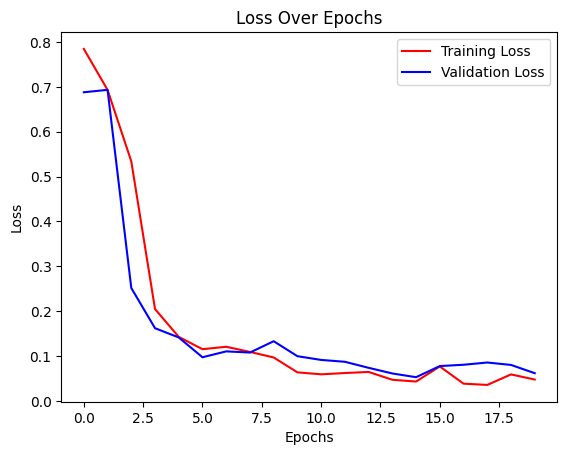

In [10]:
# Plot loss
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

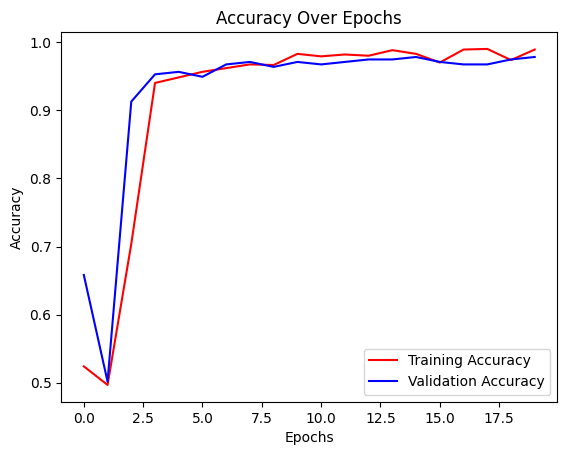

In [11]:
# Plot accuracy
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


In [13]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"\nFinal Validation Accuracy: {val_accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.9720 - loss: 0.0853

Final Validation Accuracy: 97.45%


In [14]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Load image (use same size as training images)
img_path = '/content/drive/MyDrive/data/with_mask/0-with-mask.jpg'  # 🔁 Change to your image path
img = load_img(img_path, target_size=(100, 100))    # Resize same as model input

# Convert to array and normalize
img_array = img_to_array(img) / 255.0               # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

# Predict using the model
prediction = model.predict(img_array)

# Get predicted class index
predicted_class_index = np.argmax(prediction)

# Get class labels (same order as training generator)
class_labels = list(train_generator.class_indices.keys())

# Output prediction
print(f"Predicted Class: {class_labels[predicted_class_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
Predicted Class: with_mask


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


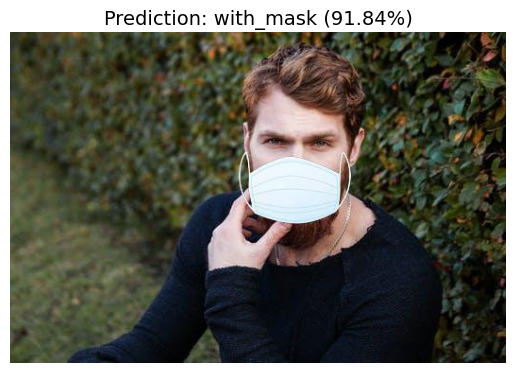

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Load image
img_path = '/content/drive/MyDrive/data/with_mask/0-with-mask.jpg'  # 🔁 Update this path
img = load_img(img_path, target_size=(100, 100))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
confidence = np.max(prediction)

# Class labels (from your generator)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_index]

# Show image with prediction
plt.imshow(load_img(img_path))  # original image
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)", fontsize=14)
plt.show()
